# Healthcare - Persistency of a drug
#### One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

In [1]:
import pandas as pd   # For data manupulation using dataframes
import numpy as np    # For Statistical Analysis
import math

In [2]:
d=pd.read_excel('Healthcare_dataset.xlsx')
d.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [3]:
# no of rows and columns
d.shape

(3424, 69)

In [4]:
# Datatypes of columns and non-null values
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

In [6]:
# display numeric and categorical features
def display_numeric_categoric_feature(dataset):
    numeric_columns = numeric_features(dataset)
    print("Numeric Features:")
    print(numeric_columns)
    print("===="*20)
    categorical_columns = categorical_features(dataset)
    print("Categorical Features:")
    print(categorical_columns)

In [7]:
display_numeric_categoric_feature(d)

Numeric Features:
Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks'], dtype='object')
Categorical Features:
Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx

In [8]:
# total null values in the dataset
d.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [9]:
d.isna().apply(pd.value_counts)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
False,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424


There is no null value in the dataset


In [10]:
# Description of numerical columns
d.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [11]:
# list of columns 
d.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

# Exploratory Data analysis

In [12]:
# Remove duplicate rows
d=d.drop_duplicates()
d

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


There is no duplicate row

In [13]:
#Drop ptid column
d.drop(columns='Ptid',axis=1,inplace=True)

# Visualization and Preprocessing

In [14]:
import matplotlib.pyplot as plt       # For Data Visualisation
import seaborn as sns                 # for statistical Data Visualisation
import warnings
warnings.filterwarnings('ignore')

## Univariate Analysis for Continuous Columns

array([[<AxesSubplot:title={'center':'Dexa_Freq_During_Rx'}>,
        <AxesSubplot:title={'center':'Count_Of_Risks'}>]], dtype=object)

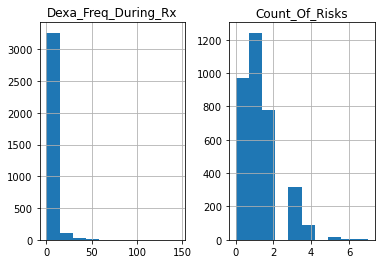

In [15]:
d.hist()

There is uneven distribution of data in both continuous columns

<AxesSubplot:>

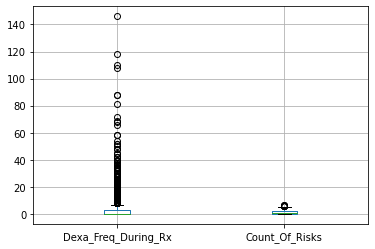

In [16]:
d.boxplot()

There are outliers in both continuous columns

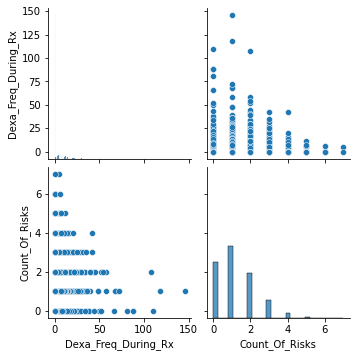

In [17]:
sns.pairplot(d) #visuals representation of Correlation between all continuous columns.

There is very low correlation between both the numerical columns

## Univariate Analysis for Categorical Columns

Text(0.5, 1.0, 'Region')

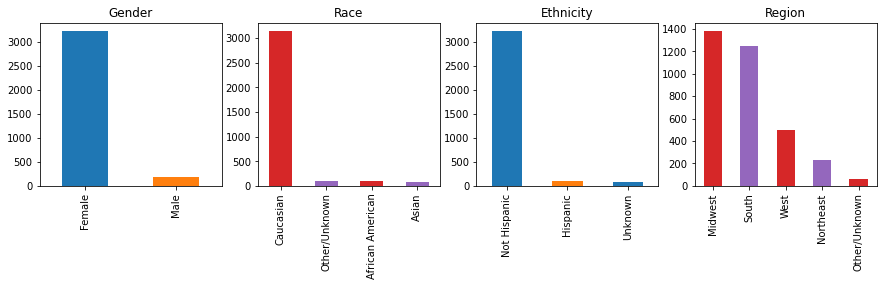

In [20]:
plt.figure(figsize=(15,3))
plt.subplot(1,4,1);d['Gender'].value_counts().plot(kind='bar',color=['C0','C1']);plt.title('Gender')
plt.subplot(1,4,2);d['Race'].value_counts().plot(kind='bar',color=['C3','C4']);plt.title('Race')
plt.subplot(1,4,3);d['Ethnicity'].value_counts().plot(kind='bar',color=['C0','C1']);plt.title('Ethnicity')
plt.subplot(1,4,4);d['Region'].value_counts().plot(kind='bar',color=['C3','C4']);plt.title('Region')

Text(0.5, 1.0, 'Ntm_Speciality_Bucket')

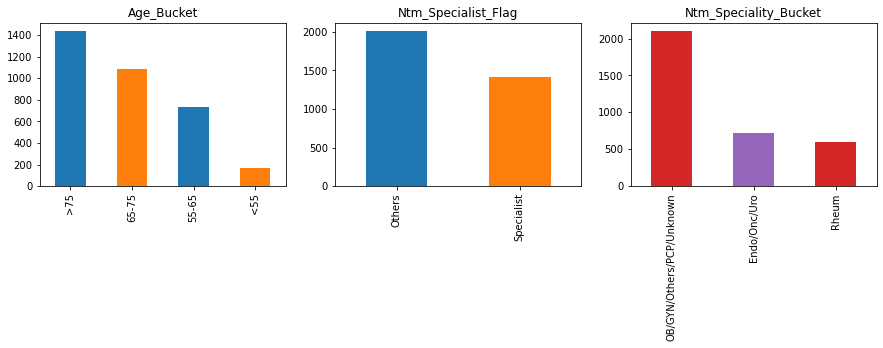

In [24]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1);d['Age_Bucket'].value_counts().plot(kind='bar',color=['C0','C1']);plt.title('Age_Bucket')
plt.subplot(1,3,2);d['Ntm_Specialist_Flag'].value_counts().plot(kind='bar',color=['C0','C1']);plt.title('Ntm_Specialist_Flag')
plt.subplot(1,3,3);d['Ntm_Speciality_Bucket'].value_counts().plot(kind='bar',color=['C3','C4']);plt.title('Ntm_Speciality_Bucket')

Text(0.5, 1.0, 'Ntm_Speciality')

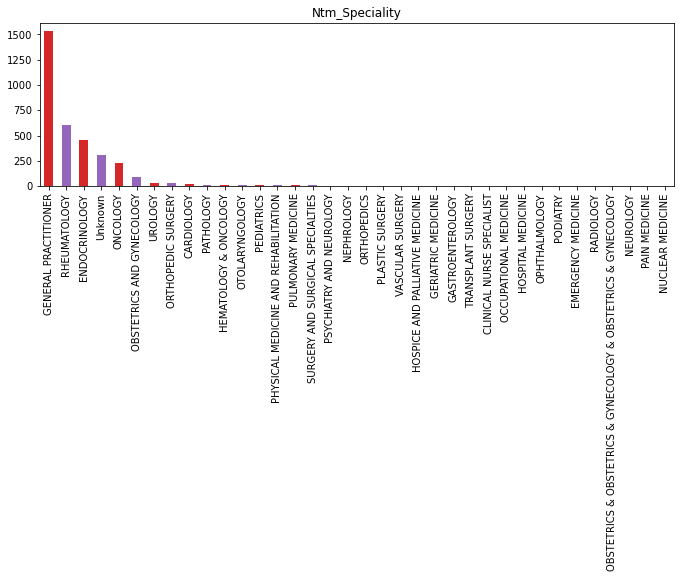

In [25]:
plt.figure(figsize=(25,3))
plt.subplot(1,2,2);d['Ntm_Speciality'].value_counts().plot(kind='bar',color=['C3','C4']);plt.title('Ntm_Speciality')

Text(0.5, 1.0, 'Dexa_During_Rx')

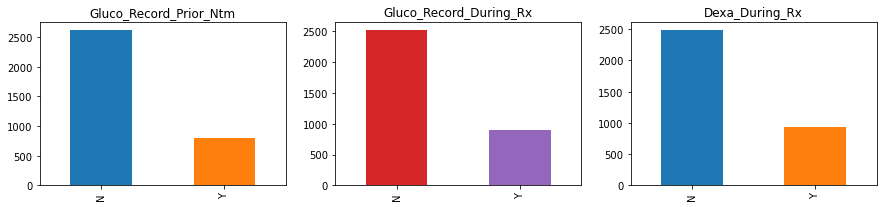

In [26]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1);d['Gluco_Record_Prior_Ntm'].value_counts().plot(kind='bar',color=['C0','C1']);plt.title('Gluco_Record_Prior_Ntm')
plt.subplot(1,3,2);d['Gluco_Record_During_Rx'].value_counts().plot(kind='bar',color=['C3','C4']);plt.title('Gluco_Record_During_Rx')
plt.subplot(1,3,3);d['Dexa_During_Rx'].value_counts().plot(kind='bar',color=['C0','C1']);plt.title('Dexa_During_Rx')

Text(0.5, 1.0, 'Risk_Segment_Prior_Ntm')

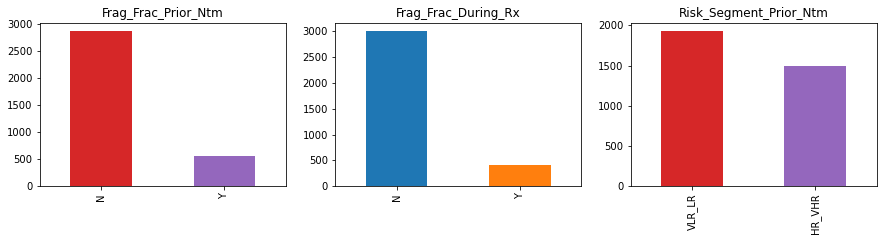

In [27]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1);d['Frag_Frac_Prior_Ntm'].value_counts().plot(kind='bar',color=['C3','C4']);plt.title('Frag_Frac_Prior_Ntm')
plt.subplot(1,3,2);d['Frag_Frac_During_Rx'].value_counts().plot(kind='bar',color=['C0','C1']);plt.title('Frag_Frac_During_Rx')
plt.subplot(1,3,3);d['Risk_Segment_Prior_Ntm'].value_counts().plot(kind='bar',color=['C3','C4']);plt.title('Risk_Segment_Prior_Ntm')

## Bivariate Analysis

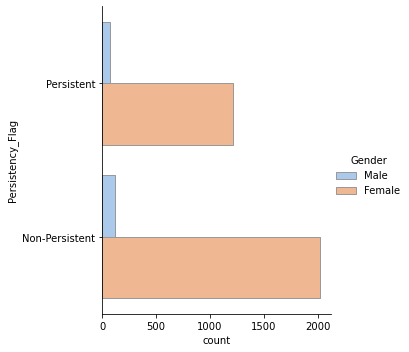

In [28]:
sns.catplot(
    data=d, y="Persistency_Flag", hue="Gender", kind="count",
    palette="pastel", edgecolor=".6",)

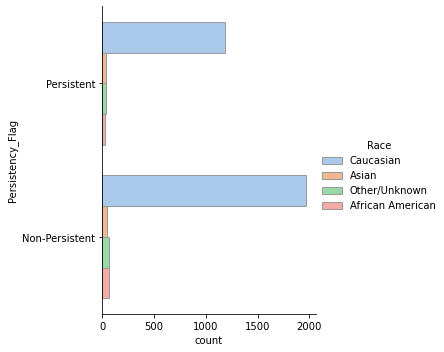

In [29]:
sns.catplot(
    data=d, y="Persistency_Flag", hue="Race", kind="count",
    palette="pastel", edgecolor=".6",)

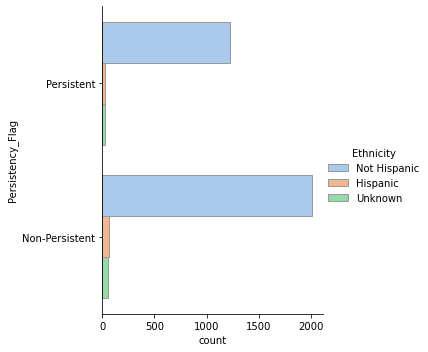

In [30]:
sns.catplot(
    data=d, y="Persistency_Flag", hue="Ethnicity", kind="count",
    palette="pastel", edgecolor=".6",)

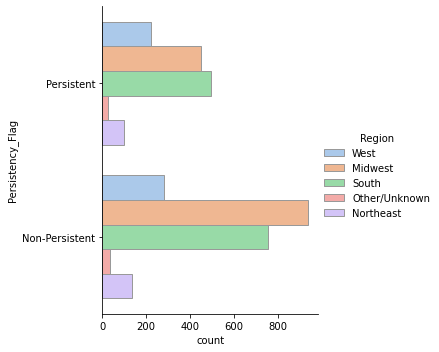

In [31]:
sns.catplot(
    data=d, y="Persistency_Flag", hue="Region", kind="count",
    palette="pastel", edgecolor=".6",)

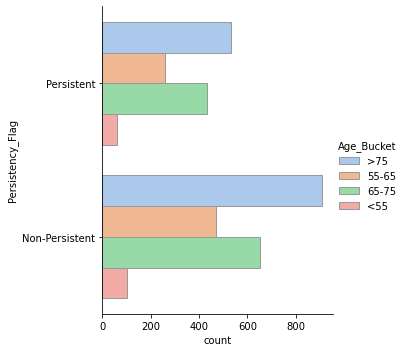

In [32]:
sns.catplot(
    data=d, y="Persistency_Flag", hue="Age_Bucket", kind="count",
    palette="pastel", edgecolor=".6",)

Through bivariate analysis did not get significant insights

## Categorical Feature Selection using  Chi - Square test of Independence

In [33]:
cat_col=d.drop(columns=['Dexa_Freq_During_Rx', 'Count_Of_Risks'])
cat_col.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,N
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,N
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,N
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,N
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,N


In [34]:
categorical_columns = categorical_features(d)

In [35]:
# Convert object to category
d[categorical_columns]=d[categorical_columns].astype("category")

In [36]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Persistency_Flag                                                    3424 non-null   category
 1   Gender                                                              3424 non-null   category
 2   Race                                                                3424 non-null   category
 3   Ethnicity                                                           3424 non-null   category
 4   Region                                                              3424 non-null   category
 5   Age_Bucket                                                          3424 non-null   category
 6   Ntm_Speciality                                                      3424 non-null   category
 7   Ntm_Sp

In [37]:
# encoding categorical features into numeric
d[categorical_columns]=d[categorical_columns].apply(lambda x: x.cat.codes)

In [38]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Persistency_Flag                                                    3424 non-null   int8 
 1   Gender                                                              3424 non-null   int8 
 2   Race                                                                3424 non-null   int8 
 3   Ethnicity                                                           3424 non-null   int8 
 4   Region                                                              3424 non-null   int8 
 5   Age_Bucket                                                          3424 non-null   int8 
 6   Ntm_Speciality                                                      3424 non-null   int8 
 7   Ntm_Specialist_Flag              

In [39]:
x=d[categorical_columns].drop(columns=['Persistency_Flag'])
y=d['Persistency_Flag']

## Categorical Feature Selection using sklearn library and chi2 and SelectKbest function

In [40]:
from sklearn.feature_selection import chi2, SelectKBest

In [41]:
cs= SelectKBest (score_func = chi2, k= "all")
cs.fit(x,y)
feature_score = pd.DataFrame({"Score":cs.scores_, "P_Values": cs.pvalues_},index = x.columns)
feature_score.nlargest(n=61, columns="Score")

,Score,P_Values
Dexa_During_Rx,601.821735,6.722923e-133
Comorb_Long_Term_Current_Drug_Therapy,324.413431,1.583364e-72
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,196.456669,1.239081e-44
Comorb_Encounter_For_Immunization,189.482869,4.122973e-43
Comorb_Other_Disorders_Of_Bone_Density_And_Structure,177.698458,1.541551e-40
...,...,...
Risk_Untreated_Early_Menopause,0.095081,7.578140e-01
Gluco_Record_Prior_Ntm,0.086825,7.682533e-01
Risk_Family_History_Of_Osteoporosis,0.037398,8.466578e-01
Risk_Osteogenesis_Imperfecta,0.023770,8.774707e-01


Eliminate Categorical features with less or no relationship with target variable considering the p-value> 0.05

In [42]:
#drop categoricalcolumns with less or no relationship with traget varibale
remove_columns = ['Ntm_Speciality','Gender','Risk_Low_Calcium_Intake','Risk_Segment_Prior_Ntm',
                  'Risk_Patient_Parent_Fractured_Their_Hip','Change_Risk_Segment','Risk_Untreated_Early_Menopause',
                  'Gluco_Record_Prior_Ntm','Risk_Family_History_Of_Osteoporosis','Risk_Osteogenesis_Imperfecta','Age_Bucket',
                  'Race','Risk_Segment_During_Rx','Ethnicity','Frag_Frac_Prior_Ntm']

d.drop(columns=remove_columns,inplace=True)               

In [43]:
d.sample(10)

,Persistency_Flag,Region,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,Tscore_Bucket_Prior_Ntm,Tscore_Bucket_During_Rx,...,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
2632,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
908,1,3,1,2,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
723,0,0,0,1,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
138,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2077,0,4,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2008,0,3,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1780,1,4,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1624,1,2,0,1,0,0,0,0,0,2,...,1,0,1,0,0,0,0,0,0,2
3332,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3013,1,0,1,2,1,8,1,0,1,1,...,0,0,1,0,0,0,0,0,0,2


In [44]:
d.shape

(3424, 53)

In [45]:
# list of columns 
d.columns

Index(['Persistency_Flag', 'Region', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_During_Rx',
       'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_During_Rx',
       'Tscore_Bucket_Prior_Ntm', 'Tscore_Bucket_During_Rx', 'Change_T_Score',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteopor

# Evaluation

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X= d.drop(columns='Persistency_Flag')
Y = d['Persistency_Flag']

In [48]:
Y.value_counts()

0    2135
1    1289
Name: Persistency_Flag, dtype: int64

## Balance the dataset

In [49]:
# balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

In [50]:
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_res))

Resampled dataset shape Counter({1: 2135, 0: 2135})


In [51]:
Y_res.value_counts()

1    2135
0    2135
Name: Persistency_Flag, dtype: int64

In [52]:
# splitting dataset in 80% train dataset and 20% test dataset
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res, test_size=0.2,random_state=42)

In [53]:
X_train.shape

(3416, 52)

In [54]:
X_test.shape

(854, 52)

# Model Building

## Logistic Regression 

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
reg=LogisticRegression()
reg.fit(X_train,Y_train) # Fit the model to the training data

LogisticRegression()

In [57]:
Y_pred=reg.predict(X_test) # Predict the classes on the test data
Y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [58]:
np.mean(Y_pred==Y_test)

0.7740046838407494

In [59]:
pd.crosstab(Y_test,Y_pred)

col_0,0,1
Persistency_Flag,,
0,335,83
1,110,326


In [60]:
lreg_data=reg.score(X,Y)
lreg_train=reg.score(X_train,Y_train)
lreg_test=reg.score(X_test,Y_test)
print ("Accuracy of All dataset: " ,(lreg_data))
print ("Accuracy of Train dataset: " ,(lreg_train))
print ("Accuracy of Test dataset: " ,(lreg_test))

Accuracy of All dataset:  0.8022780373831776
Accuracy of Train dataset:  0.7854215456674473
Accuracy of Test dataset:  0.7740046838407494


## RandomForestClassifier 

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf = RandomForestClassifier(max_depth=3, random_state=42)
clf.fit(X_train,Y_train) # Fit the model to the training data

RandomForestClassifier(max_depth=3, random_state=42)

In [63]:
Y1_pred=clf.predict(X_test) # Predict the classes on the test data
Y1_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [64]:
np.mean(Y1_pred==Y_test)

0.7517564402810304

In [65]:
pd.crosstab(Y_test,Y1_pred)

col_0,0,1
Persistency_Flag,,
0,369,49
1,163,273


In [66]:
rft_data=clf.score(X,Y)
rft_train=clf.score(X_train,Y_train)
rft_test=clf.score(X_test,Y_test)
print ("Accuracy of All dataset: " ,(rft_data))
print ("Accuracy of Train dataset: " ,(rft_train))
print ("Accuracy of Test dataset: " ,(rft_test))

Accuracy of All dataset:  0.8028621495327103
Accuracy of Train dataset:  0.7681498829039812
Accuracy of Test dataset:  0.7517564402810304


# KNeighborsClassifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,Y_train) # Fit the model to the training data

KNeighborsClassifier()

In [69]:
YK_pred=neigh.predict(X_test) # Predict the classes on the test data
YK_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [70]:
np.mean(YK_pred==Y_test)

0.7868852459016393

In [71]:
pd.crosstab(Y_test,YK_pred)

col_0,0,1
Persistency_Flag,,
0,332,86
1,96,340


In [72]:
knc_data=neigh.score(X,Y)
knc_train=neigh.score(X_train,Y_train)
knc_test=neigh.score(X_test,Y_test)
print ("Accuracy of All dataset: " ,(knc_data))
print ("Accuracy of Train dataset: " ,(knc_train))
print ("Accuracy of Test dataset: " ,(knc_test))

Accuracy of All dataset:  0.8373247663551402
Accuracy of Train dataset:  0.8635831381733021
Accuracy of Test dataset:  0.7868852459016393


Overfitting model!

## GradientBoostingClassifer

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
model=GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=2, random_state=40)
model.fit(X_train,Y_train) # Fit the model to the training data

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=300,
                           random_state=40)

In [75]:
Y2_pred=model.predict(X_test) # Predict the classes on the test data
Y2_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [76]:
np.mean(Y2_pred==Y_test)

0.7704918032786885

In [77]:
pd.crosstab(Y_test,Y2_pred)

col_0,0,1
Persistency_Flag,,
0,333,85
1,111,325


In [78]:
gbc_data=model.score(X,Y)
gbc_train=model.score(X_train,Y_train)
gbc_test=model.score(X_test,Y_test)
print ("Accuracy of All dataset: " ,(gbc_data))
print ("Accuracy of Train dataset: " ,(gbc_train))
print ("Accuracy of Test dataset: " ,(gbc_test))

Accuracy of All dataset:  0.8574766355140186
Accuracy of Train dataset:  0.8679742388758782
Accuracy of Test dataset:  0.7704918032786885


The score of train dataset is higher than test dataset which means its overfitting. let's do hyperparameter tuning for grid gradient boosting classifier model.

# Hyperparameter Tuning

### K Neighbor Classifier

In [79]:
from sklearn.model_selection import GridSearchCV

In [83]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()



In [84]:
#Use GridSearch
modelK = GridSearchCV(knn_2, hyperparameters, cv=5)

In [85]:
#Fit the model
best_model = modelK.fit(X_train,Y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 5


In [86]:
modelkn= KNeighborsClassifier(n_neighbors=5,p=2,leaf_size=1)

In [87]:
modelkn.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=1)

In [88]:
Ykn_pred=modelkn.predict(X_test)
Ykn_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [89]:
np.mean(Ykn_pred==Y_test)

0.7868852459016393

In [90]:
pd.crosstab(Y_test,Ykn_pred)

col_0,0,1
Persistency_Flag,,
0,332,86
1,96,340


In [91]:
knnc_data=modelkn.score(X,Y)
knnc_train=modelkn.score(X_train,Y_train)
knnc_test=modelkn.score(X_test,Y_test)
print ("Accuracy of All dataset: " ,(knnc_data))
print ("Accuracy of Train dataset: " ,(knnc_train))
print ("Accuracy of Test dataset: " ,(knnc_test))

Accuracy of All dataset:  0.8373247663551402
Accuracy of Train dataset:  0.8635831381733021
Accuracy of Test dataset:  0.7868852459016393


### Gradient Boosting Classifier 

In [92]:
gb = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,75,100],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1,10]}

In [93]:
cv = GridSearchCV(gb,parameters,cv=5) # Here we are using 5 iterations
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [5, 50, 75, 100]})

In [94]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 75}

In [139]:
cv.best_score_

0.8170374080638394

In [95]:
model1=GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, max_depth=7, random_state=42)
model1.fit(X_train,Y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=75, random_state=42)

In [96]:
YY_pred=model1.predict(X_test)
YY_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [97]:
np.mean(YY_pred==Y_test)

0.8032786885245902

In [98]:
pd.crosstab(Y_test,YY_pred)

col_0,0,1
Persistency_Flag,,
0,343,75
1,93,343


In [99]:
gb_data=model1.score(X,Y)
gb_train=model1.score(X_train,Y_train)
gb_test=model1.score(X_test,Y_test)
print ("Accuracy of All dataset: " ,(gb_data))
print ("Accuracy of Train dataset: " ,(gb_train))
print ("Accuracy of Test dataset: " ,(gb_test))

Accuracy of All dataset:  0.9427570093457944
Accuracy of Train dataset:  0.9622365339578455
Accuracy of Test dataset:  0.8032786885245902


# Metrics for Evaluation

##  Accuracy, Precision, Recall and F1-Score

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
#LogisticRegression
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       418
           1       0.80      0.75      0.77       436

    accuracy                           0.77       854
   macro avg       0.77      0.77      0.77       854
weighted avg       0.78      0.77      0.77       854



In [102]:
confusion_matrix(Y_test,Y_pred)

array([[335,  83],
       [110, 326]], dtype=int64)

In [147]:
#RandomForestTreeClassifier
print(classification_report(Y_test,Y1_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.78       418
           1       0.85      0.63      0.72       436

    accuracy                           0.75       854
   macro avg       0.77      0.75      0.75       854
weighted avg       0.77      0.75      0.75       854



In [103]:
confusion_matrix(Y_test,Y1_pred)

array([[369,  49],
       [163, 273]], dtype=int64)

In [166]:
#KNeighborsClassifier without hyperparameter tuning
print(classification_report(Y_test,YK_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       418
           1       0.80      0.78      0.79       436

    accuracy                           0.79       854
   macro avg       0.79      0.79      0.79       854
weighted avg       0.79      0.79      0.79       854



In [104]:
confusion_matrix(Y_test,YK_pred)

array([[332,  86],
       [ 96, 340]], dtype=int64)

In [167]:
#KNeighborsClassifier with hyperparameter tuning
print(classification_report(Y_test,Ykn_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       418
           1       0.80      0.78      0.79       436

    accuracy                           0.79       854
   macro avg       0.79      0.79      0.79       854
weighted avg       0.79      0.79      0.79       854



In [105]:
confusion_matrix(Y_test,Ykn_pred)

array([[332,  86],
       [ 96, 340]], dtype=int64)

In [168]:
#GradientBoostingClassifier withouthyper parameter tuning
print(classification_report(Y_test,Y2_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       418
           1       0.79      0.75      0.77       436

    accuracy                           0.77       854
   macro avg       0.77      0.77      0.77       854
weighted avg       0.77      0.77      0.77       854



In [106]:
confusion_matrix(Y_test,Y2_pred)

array([[333,  85],
       [111, 325]], dtype=int64)

In [169]:
#GradientBoostingClassifier with parameter tuning
print(classification_report(Y_test,YY_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       418
           1       0.78      0.82      0.80       436

    accuracy                           0.79       854
   macro avg       0.79      0.79      0.79       854
weighted avg       0.79      0.79      0.79       854



In [107]:
confusion_matrix(Y_test,YY_pred)

array([[343,  75],
       [ 93, 343]], dtype=int64)

## Lift and Gain

In [108]:
import scikitplot as skplt

### Logistic Regression

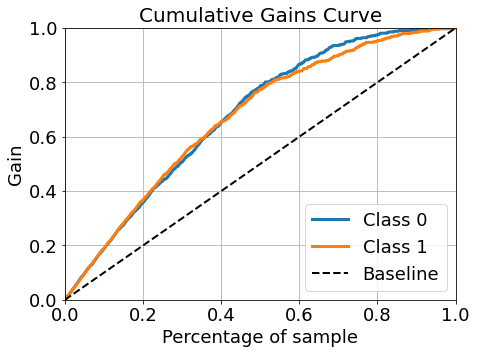

In [109]:
# Predict the classes on the test data, and return the probabilities for each class
Y_proba = reg.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(Y_test, Y_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

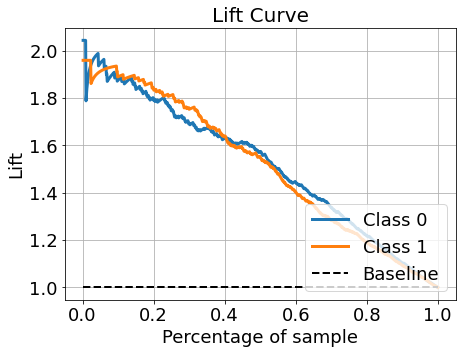

In [110]:
skplt.metrics.plot_lift_curve(Y_test, Y_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

### Random Forest Classifier

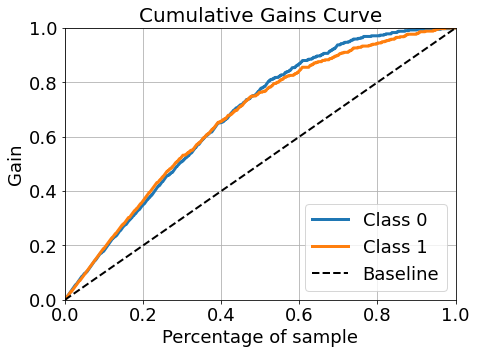

In [111]:
# Predict the classes on the test data, and return the probabilities for each class
Y1_proba = clf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(Y_test, Y1_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

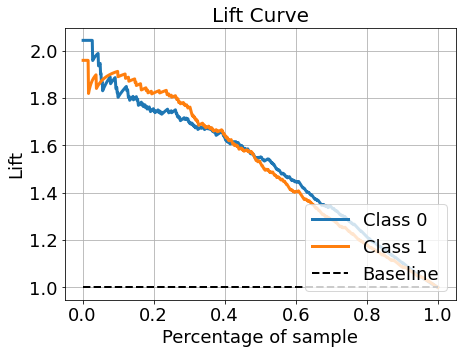

In [112]:
skplt.metrics.plot_lift_curve(Y_test, Y1_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

### KNN Classifier 

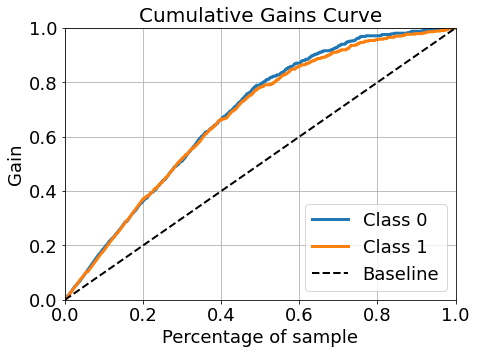

In [122]:
# Predict the classes on the test data, and return the probabilities for each class
YK_proba = neigh.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(Y_test, YK_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

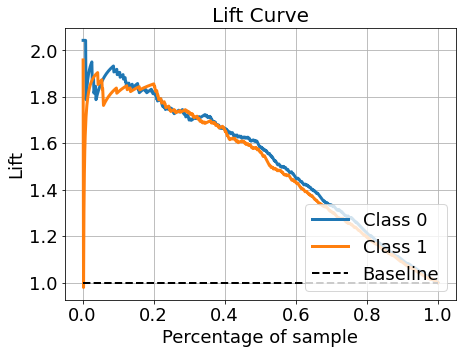

In [123]:
skplt.metrics.plot_lift_curve(Y_test, YK_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

### KNN Classifier with hyperparameter tuning 

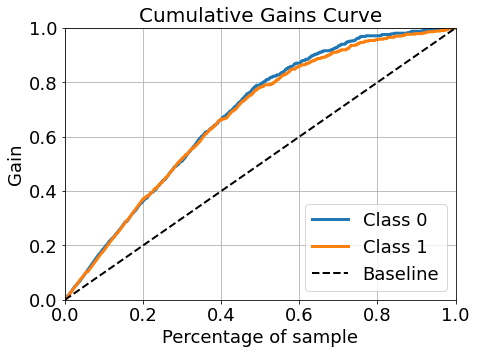

In [124]:
# Predict the classes on the test data, and return the probabilities for each class
Ykn_proba = modelkn.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(Y_test, Ykn_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

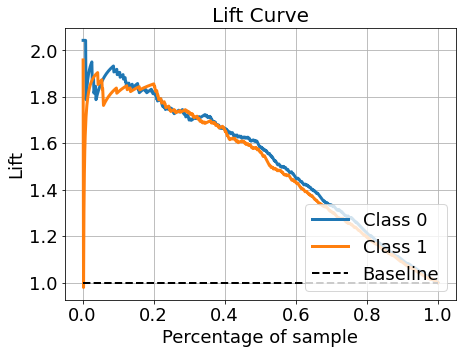

In [125]:
skplt.metrics.plot_lift_curve(Y_test, Ykn_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

### gradient Boosting Classifier 

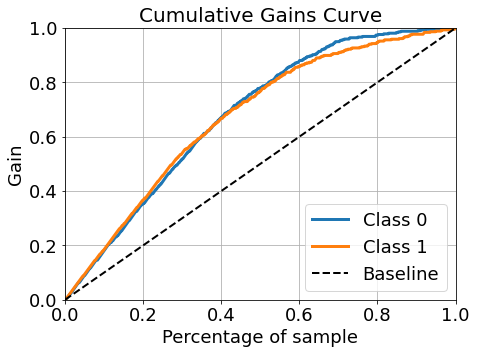

In [126]:
# Predict the classes on the test data, and return the probabilities for each class
Y2_proba = model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(Y_test, Y2_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

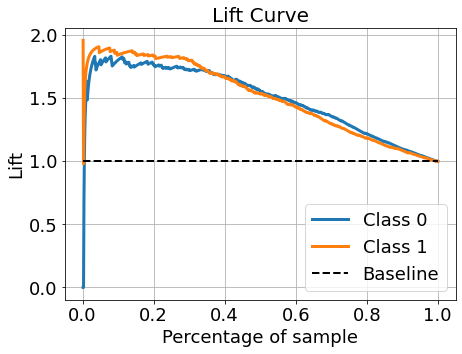

In [127]:
skplt.metrics.plot_lift_curve(Y_test, Y2_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

### gradient Boosting Classifier with hyperparameter tuning

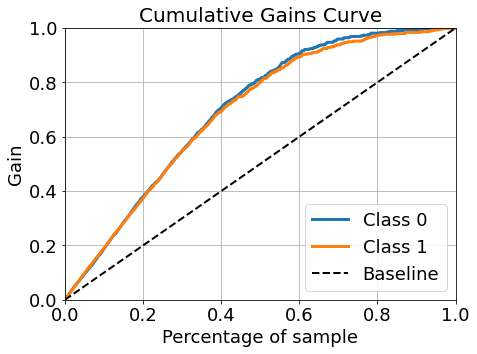

In [128]:
# Predict the classes on the test data, and return the probabilities for each class
YY_proba = model1.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(Y_test, YY_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

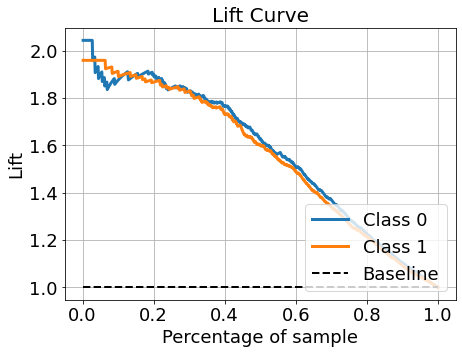

In [129]:
skplt.metrics.plot_lift_curve(Y_test, YY_proba, figsize=(7, 5), title_fontsize=20, text_fontsize=18)
plt.show()

## KS Statistics and ROC-AUC Score

In most binary classification problems we use the KS-2samp test and ROC AUC score as measurements of how well the model separates the predictions of the two different classes.
The KS statistic for two samples is simply the highest distance between their two CDFs, so if we measure the distance between the positive and negative class distributions, we can have another metric to evaluate classifiers.
The ROC AUC score goes from 0.5 to 1.0, while KS statistics range from 0.0 to 1.0

In [130]:
from scipy import stats
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

In [131]:
#Logistic Regression
# Fit the model to the training data
reg.fit(X_train,Y_train)
# Predict the classes on the test data
Y_pred=reg.predict(X_test)
# Predict the classes on the test data, and return the probabilities for each class
Y_proba = reg.predict_proba(X_test)

In [132]:
#RandomForestClassifier
# Fit the model to the training data
clf.fit(X_train,Y_train)
# Predict the classes on the test data
Y1_pred=clf.predict(X_test)
# Predict the classes on the test data, and return the probabilities for each class
Y1_proba = clf.predict_proba(X_test)

In [133]:
#KNeighborsClassifier without hyperparameter tuning 
# Fit the model to the training data
neigh.fit(X_train,Y_train)
# Predict the classes on the test data
YK_pred=neigh.predict(X_test)
# Predict the classes on the test data, and return the probabilities for each class
YK_proba = neigh.predict_proba(X_test)

In [134]:
#KNeighborsClassifier with hyperparameter tuning 
# Fit the model to the training data
modelkn.fit(X_train,Y_train)
# Predict the classes on the test data
Ykn_pred=modelkn.predict(X_test)
# Predict the classes on the test data, and return the probabilities for each class
Ykn_proba = modelkn.predict_proba(X_test)

In [135]:
#BoostingGradientClassifier without hyperparameter tuning 
# Fit the model to the training data
model.fit(X_train,Y_train)
# Predict the classes on the test data
Y2_pred=model.predict(X_test)
# Predict the classes on the test data, and return the probabilities for each class
Y2_proba = model.predict_proba(X_test)

In [136]:
#BoostingGradientClassifier with hyperparameter tuning 
# Fit the model to the training data
model1.fit(X_train,Y_train)
# Predict the classes on the test data
YY_pred=model1.predict(X_test)
# Predict the classes on the test data, and return the probabilities for each class
YY_proba = model1.predict_proba(X_test)

In [137]:
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    return ks.statistic, roc_auc

In [138]:
print("Logistic Regression:")
ks_LR, auc_LR = evaluate_ks_and_roc_auc(Y_test, Y_proba)

Logistic Regression:
KS: 0.5652 (p-value: 9.293e-65)
ROC AUC: 0.8490


In [139]:
print("Random Forest classifier:")
ks_RFC, auc_RFC = evaluate_ks_and_roc_auc(Y_test, Y1_proba)

Random Forest classifier:
KS: 0.5563 (p-value: 1.449e-62)
ROC AUC: 0.8437


In [140]:
print("KNeighbors classifier:")
ks_RFC, auc_RFC = evaluate_ks_and_roc_auc(Y_test, YK_proba)

KNeighbors classifier:
KS: 0.5741 (p-value: 5.306e-67)
ROC AUC: 0.8500


In [141]:
print("KNeighbors classifier with hyperparameter tuning:")
ks_RFC, auc_RFC = evaluate_ks_and_roc_auc(Y_test, Ykn_proba)

KNeighbors classifier with hyperparameter tuning:
KS: 0.5741 (p-value: 5.306e-67)
ROC AUC: 0.8500


In [142]:
print("Gradient Boosting classifier:")
ks_GBC, auc_GBC = evaluate_ks_and_roc_auc(Y_test, Y2_proba)

Gradient Boosting classifier:
KS: 0.5564 (p-value: 1.354e-62)
ROC AUC: 0.8530


In [143]:
print("Gradient Boosting classifier with hyperparameter tuning:")
ks_GBC, auc_GBC = evaluate_ks_and_roc_auc(Y_test, YY_proba)

Gradient Boosting classifier with hyperparameter tuning:
KS: 0.6243 (p-value: 1.022e-80)
ROC AUC: 0.8888


After considering score,classification report, confusion Matrix, lift anf gain curves, KS-Statistics and ROC-AUC score KNNC without Hyperparameter tuning is the best model

# Save the Model

In [144]:
# import pickle library
import pickle # its used for seriealizing and de-seriealizing a python object Structure
pickle.dump(neigh, open('model.pkl','wb'))       # open the file for writing
model = pickle.load(open('model.pkl','rb'))    # dump an object to file object

In [146]:
print(model.predict([[0,2,1,0,3,5,0,1,0,0,0,0,0,1,1,1,2,1,2,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))

[1]
